## TO DO
- [ ] <strike>Treinar um modelo, gerar novos dados apenas com volume e vazão diferentes, ver o desempenho</strike>
- [ ] <strike>Diferentes situações:</strike>
    - [x] reação inversa
    - [x] adiabática
- [x] <strike> Ver quanto tempo demora pra atingir o estado estacionário (provavelmente algumas amostras só)</strike>
- [x] <strike> Quantos pontos mínimos para treinar bem ?</strike>
- [ ] Gerar novo dataset com ordem 0, ver se outra função de ativação se adeua melhor

<H1>0. Import packages </H1>

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
history = History()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h2>1. Read data </h2>

In [3]:
data_path = '../data_section/datas/data_n1000_order2.csv'
data = pd.read_csv(data_path, index_col=0)
V = 500

<h2>2. Select features</h2>

- Normalize it
- Split it in train and test sets

In [4]:
x_cols = ['Cae', 'Cbe', 'T']
y_col = ['Cc']

minmax = MinMaxScaler()
in_data = minmax.fit_transform(data[x_cols].to_numpy())

X_train, X_test, Y_train, Y_test = train_test_split(in_data, data[y_col].to_numpy(), test_size=.3, )
Y_test = Y_test.reshape(Y_test.shape[0])
Y_train = Y_train.reshape(Y_train.shape[0])

print(f'x train: {X_train.shape}, x test: {X_test.shape}')
print(f'y train: {Y_train.shape}, y test: {Y_test.shape}')

x train: (700, 3), x test: (300, 3)
y train: (700,), y test: (300,)


<h2>3. Create the network </h2>

- How many layers
- How many neurons per layer
- Which activation function
- Which metrics
- How long will be the training (using epochs)
- Whether use validation sets or not

In [53]:
model = Sequential()
model.add(Dense(15, input_dim=X_train.shape[1], activation='exponential'))
model.add(Dense(7, activation='exponential', ))
model.add(Dense(5, activation='sigmoid', ))
model.add(Dense(3, activation='exponential'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
hist = model.fit(X_train, Y_train, epochs=200, verbose=0, validation_split=.3, use_multiprocessing=True)
evaluate(model, X_train, X_test, Y_train, Y_test)

Train: 14.1750
Test: 12.2384


<h2>4. Validate the results</h2>

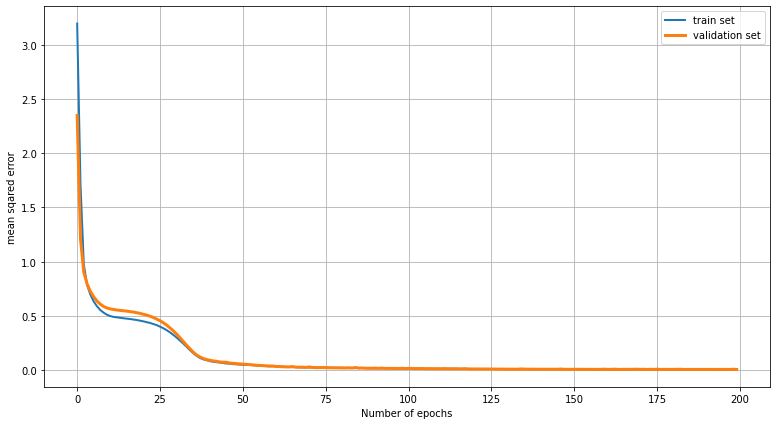

In [54]:
plot_loss_history(hist)

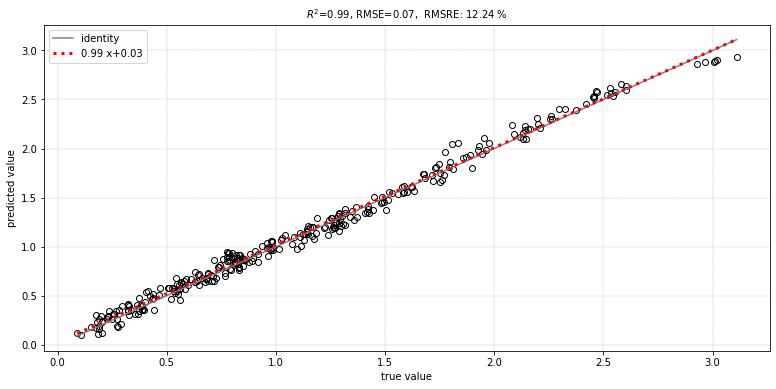

In [55]:
plot_identity_keras(model, X_test, Y_test)

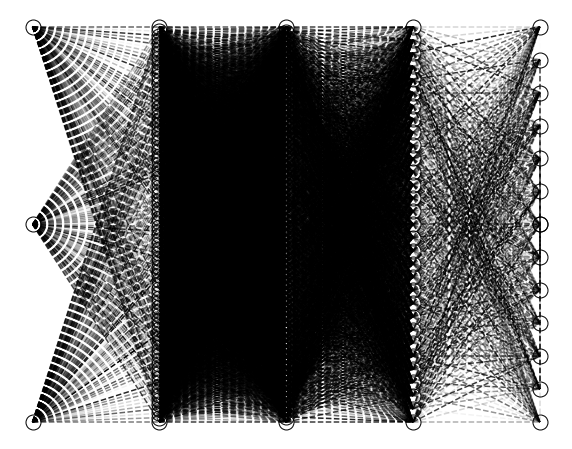

In [132]:
plot_rnn_keras(model)

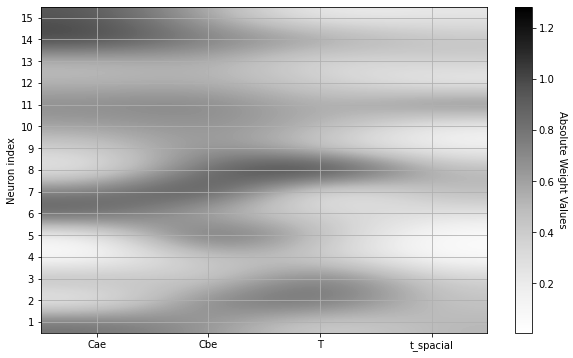

In [42]:
plot_first_layer_keras(model, label=x_cols)

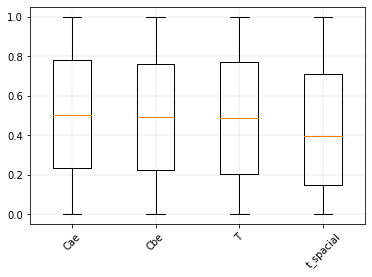

In [45]:
plot_boxplot_input(in_data, x_cols)

<H2>5. Save the model</H2>

In [30]:
model.save('models/' + data_path.split('/')[-1].replace('data', 'model').replace('csv', 'h5'))

<h2>6. (OPTIONAL) Load the model</h2>

In [12]:
model = load_model('models/500_dados.hdf5')

In [ ]:
a = keras.models.load_model('models/model_n1000_order2.h5', compile=True)

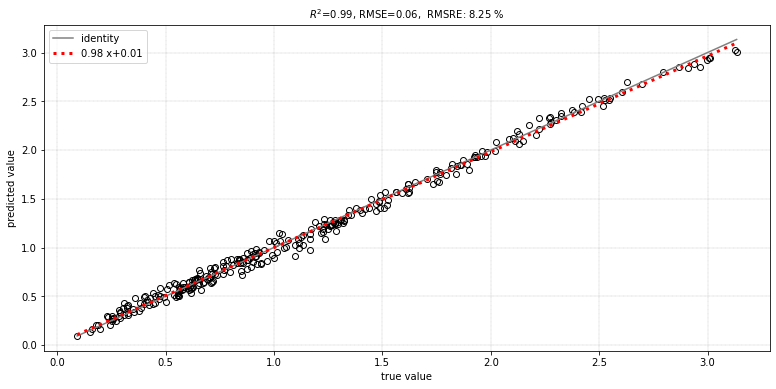

In [10]:
plot_identity_keras(a, X_test, Y_test)